<ins><b>Neural Network & Deep Learning </b></ins>





<ins><b>Lab-2:</b></ins> Multilayer Perceptron and Hyperparameter Tuning

- Experiment the performance of the Multilayer Perceptron on the dataset used for Perceptron Implementation.
- Moreover, tune a Multilayer Perceptron on the Adult Dataset.

# Importing the required modules

In [1]:
# Modules used for data handling and linear algebra operations.
import pandas as pd
import numpy as np

# Modules used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for preprocessing
from sklearn.preprocessing import OneHotEncoder

# Modules used for Machine Learning models.
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Modules used for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Models used for evaluating the model.
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Suppressing the warnings.
import warnings
warnings.filterwarnings('ignore')

# Comparision of the Perceptron and MLP on Credit Card Approval Dataset

## Reading the dataset

In [2]:
df = pd.read_csv("cirrhosis.csv", header=None)

## Glimpse into the dataset

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.6,156,1718,137.95,172,190,12.2,4
2,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
3,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516,96.1,55,151,12,4
4,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4


In [4]:
headers = df.iloc[0]
df  = pd.DataFrame(df.values[1:], columns=headers)

In [5]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.6,156,1718,137.95,172,190,12.2,4
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516,96.1,55,151,12,4
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671,113.15,72,136,10.9,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             418 non-null    object
 1   N_Days         418 non-null    object
 2   Status         418 non-null    object
 3   Drug           312 non-null    object
 4   Age            418 non-null    object
 5   Sex            418 non-null    object
 6   Ascites        312 non-null    object
 7   Hepatomegaly   312 non-null    object
 8   Spiders        312 non-null    object
 9   Edema          418 non-null    object
 10  Bilirubin      418 non-null    object
 11  Cholesterol    284 non-null    object
 12  Albumin        418 non-null    object
 13  Copper         310 non-null    object
 14  Alk_Phos       312 non-null    object
 15  SGOT           312 non-null    object
 16  Tryglicerides  282 non-null    object
 17  Platelets      407 non-null    object
 18  Prothrombin    416 non-null   

## Data Type Distribution

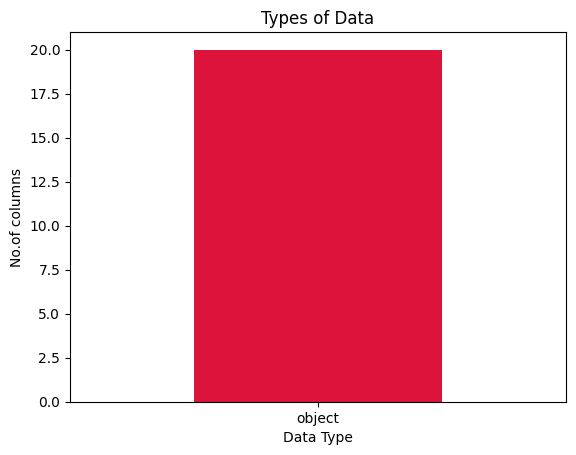

In [7]:
df.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

Most of columns are categorical while the others are numerical.

## Seggragation of Columns

In [8]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

## Missing Values Analysis

In [9]:
null_freq = []
for i in df.columns:
    f = dict(df[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(df))
    else:
        null_freq.append(0)

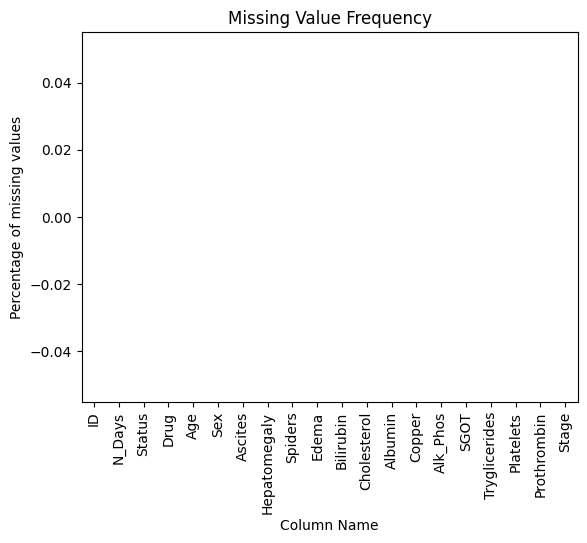

In [10]:
pd.Series(dict(zip(df.columns,null_freq))).plot(kind="bar",
                                                rot=90,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

Only 2% of the rows are null and hence directly dropping them is feasible compared to imputation.

## Target Variable Analysis

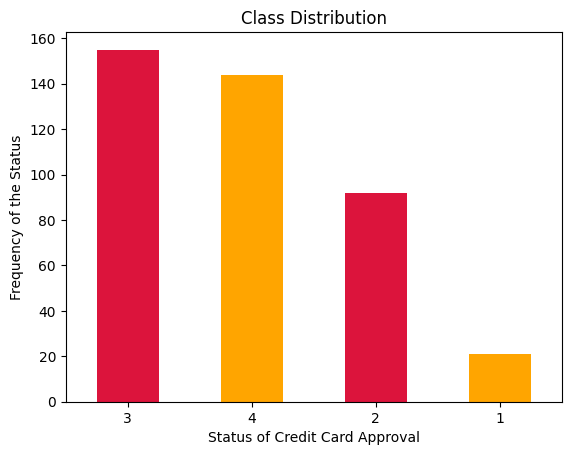

In [11]:
df['Stage'].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Status of Credit Card Approval",
                           ylabel="Frequency of the Status",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

The dataset is biased to class "-" since it has higher instances of that class compared to others.

## Pre-processing

### Handling Missing Values

In [12]:
df = df.replace({"?":None})

In [13]:
df = df.dropna()

### Encoding the categorical variables

In [14]:
encoder = OneHotEncoder(sparse=False)
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

In [15]:
df = df.reset_index()

## Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,
    df['Stage'],
    test_size = 0.30,
    train_size=0.70,
    random_state = 0
)
X_train.pop('Stage')
X_test.pop('Stage')

184    0.0
15     0.0
55     1.0
74     0.0
188    0.0
      ... 
71     0.0
238    0.0
210    0.0
265    0.0
258    0.0
Name: Stage, Length: 83, dtype: float64

## Perceptron

### Training and Fitting the model

In [17]:
clf = Perceptron(random_state=0)

In [18]:
clf.fit(X_train,y_train)

Perceptron()

### Validating the model

#### Predictions from the model on the train and test dataset

In [19]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Accuracy on the train dataset

In [20]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.9481865284974094

#### Accuracy on the test dataset

In [21]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.9518072289156626

## Multilayer Perceptron

In [22]:
clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=300,activation = 'relu',solver='adam',random_state=1).fit(X_train, y_train)

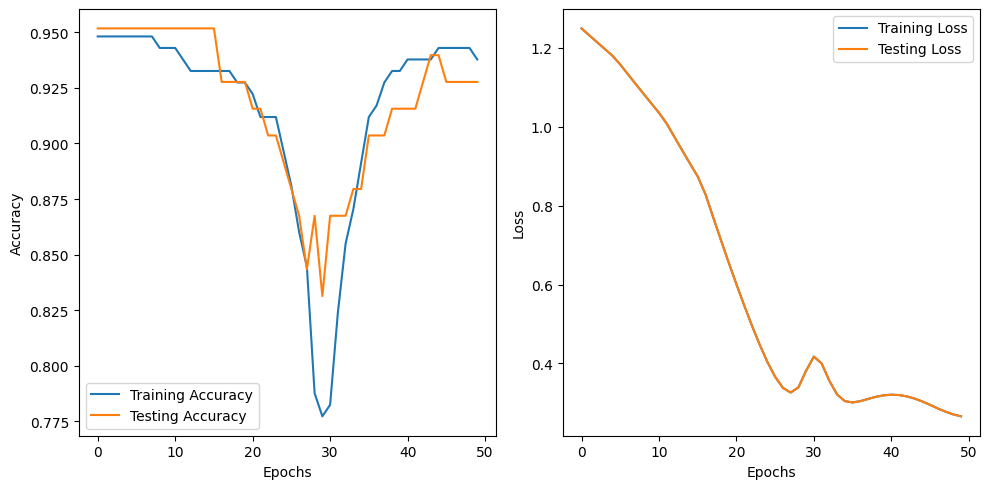

In [23]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Create an MLPClassifier with specified parameters
clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=300, activation='relu', solver='adam', random_state=1)

# Training the model with epochs
epochs = 50  # Change this value as needed
train_accuracy, test_accuracy = [], []
train_loss, test_loss = [], []

for epoch in range(epochs):
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # Training accuracy and loss
    train_accuracy.append(clf.score(X_train, y_train))
    train_loss.append(clf.loss_)
    
    # Testing accuracy and loss
    test_accuracy.append(clf.score(X_test, y_test))
    test_loss.append(clf.loss_)

# Plotting accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_accuracy, label='Training Accuracy')
plt.plot(range(epochs), test_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), test_loss, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Validating the model

#### Predictions from the model

In [24]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Accuracy on the train dataset

In [25]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.9378238341968912

#### Accuracy on the test dataset

In [26]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.927710843373494

## Comparative Inferences

- The Perceptron model gives an accuracy of 67% and 75% on the test and train dataset respectively.
- The MLP model gives an accuracy of 78% and 79% on the test and train dataset respectively.
- Addition of hidden layers gives better results indicating the dataset is not linearly separable.
- The MLP is able to learn a non-linear decision boundary compared to Perceptron which is a linear classifier.